# H&M Retail Sales Analysis - Sprint 1
---

# Import Packages and Load data
There are three tables within this [Kaggle dataset](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data?select=transactions_train.csv):
- `articles`: Detailed metadata for each article_id (product) available for purchase.
- `customers`: metadata for each customer_id in dataset.
- `transactions`: The purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
plt.rcParams['figure.figsize']=(5.5,3.5)

In [37]:
articles = pd.read_csv('articles.csv')

In [38]:
customers = pd.read_csv('customers.csv')

In [3]:
transactions = pd.read_csv('transactions_train.csv')

---

# Data Cleaning

As a data analyst, I want to conduct data preprocessing on the H&M Sales data in order to better identify quality issues, and feature engineering opportunities, and to have further observations about the data: 
- Looking individually into the 3 tables for preprocessing.
- Drop columns that might fall out of scope for this project.
- Merge them into a final dataframe for the further EDA.

---

## Articles

In [44]:
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


### Shapes, missing values, and duplicates

`articles` is the product table for this dataset. First we look at the shape, NANs, and duplicated of this table.

In [39]:
articles.shape

(105542, 25)

There are more than 100k available products (rows), and 25 columns.

In [42]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

Here we can see that the only column with missing values is detail_desc, which is around 0.4% of the total rows. 

In [41]:
articles[articles['detail_desc'].isna()==1]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,426199002,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,9,Black,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,426199010,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,8,Dark Grey,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67838,752458001,752458,Poissy boho dress,265,Dress,Garment Full body,1010007,Embroidery,10,White,...,Dress,A,Ladieswear,1,Ladieswear,6,Womens Casual,1013,Dresses Ladies,NaN
72720,768842001,768842,Andrews set,270,Garment Set,Garment Full body,1010017,Stripe,10,White,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
72721,768842004,768842,Andrews set,270,Garment Set,Garment Full body,1010004,Check,73,Dark Blue,...,Baby Boy Woven,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1006,Woven/Jersey/Knitted mix Baby,NaN
93144,856985001,856985,Pogo rope,67,Belt,Accessories,1010016,Solid,12,Light Beige,...,Belts,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,NaN


In [43]:
articles.duplicated().sum()

0

No duplicated rows in `articles`.

---

### Code and name pairs

It seems like columns are stored with duplicated information with *code/no* and *name* pairs. Here we can take a look at if codes are assign to more than 1 name. After cleaning, we would drop the codes for EDA (Might bring back codes for machine learning).

In [45]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Only `product_group_name` is not paired with code.  
Here, we deal with the following code and name pairs individually:
| Code / No.                | Name                        |
|---------------------------|-----------------------------|
| product_code              | prod_name                   |
| product_type_no           | product_type_name           |
| graphical_appearance_no   | graphical_appearance_name   |
| colour_group_code         | colour_group_name           |
| perceived_colour_value_id | perceived_colour_value_name |
| department_no             | department_name             |
| index_code                | index_name                  |
| index_group_no            | index_group_name            |
| section_no                | section_name                |
| garment_group_no          | garment_group_name          |

In [46]:
# Find out code name pairs that are not in 1-to-1 relationships
cnpairs = articles.drop(['article_id','product_group_name', 'detail_desc'], axis=1).copy()
code=[]
name=[]
diff=[]
for i in range(0, len(cnpairs.columns),2):
    code.append(cnpairs.columns[i])
    name.append(cnpairs.columns[i+1])
    diff.append(cnpairs.iloc[:,i].nunique()-cnpairs.iloc[:,i+1].nunique())
cnpairs_diff = pd.DataFrame({
    'code':code,
    'name':name,
    'diff':diff
})
cnpairs_diff

,code,name,diff
0,product_code,prod_name,1349
1,product_type_no,product_type_name,1
2,graphical_appearance_no,graphical_appearance_name,0
3,colour_group_code,colour_group_name,0
4,perceived_colour_value_id,perceived_colour_value_name,0
5,perceived_colour_master_id,perceived_colour_master_name,0
6,department_no,department_name,49
7,index_code,index_name,0
8,index_group_no,index_group_name,0
9,section_no,section_name,1


It seems like we need to look further into the following pairs:

In [47]:
cnpairs_diff[cnpairs_diff['diff']>0]

,code,name,diff
0,product_code,prod_name,1349
1,product_type_no,product_type_name,1
6,department_no,department_name,49
9,section_no,section_name,1


---

#### product_code and prod_name
- It seems like 2176 product_code have more than 1 prod_name.

In [48]:
# Finding product_code with more than one unique prod_name
code_name_pairs_product = articles.groupby('product_code')['prod_name'].nunique().reset_index()
code_name_pairs_product[code_name_pairs_product['prod_name']>1].head()

,product_code,prod_name
0,108775,2
18,146706,2
29,156610,2
31,160442,2
39,179123,2


In [49]:
articles[articles['product_code']==188183].head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
160,188183001,188183,Spanx alot shape Swimsuit,57,Swimsuit,Swimwear,1010016,Solid,9,Black,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...
161,188183008,188183,SPANX ALOT swimsuit (1),57,Swimsuit,Swimwear,1010016,Solid,8,Dark Grey,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...
162,188183009,188183,SPANX ALOT swimsuit (1),57,Swimsuit,Swimwear,1010017,Stripe,10,White,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined shaping swimsuit that has a sculpt...


We can see that the product_code with different prod_name are just having minor differences in strings. We can replace them with the most frequent name for each product code:

In [50]:
# Assigning only the most frequent name to each code
code_name_pairs_product_mode = articles.groupby('product_code')['prod_name'].agg(lambda x: pd.Series.mode(x)[0]).to_frame().reset_index()
code_name_pairs_product_mode.head()

,product_code,prod_name
0,108775,Strap top
1,110065,OP T-shirt (Idro)
2,111565,20 den 1p Stockings
3,111586,Shape Up 30 den 1p Tights
4,111593,Support 40 den 1p Tights


Sanity check... for every product_code, we only want to have one corresponding prod_name

In [51]:
(code_name_pairs_product_mode.groupby('product_code')['prod_name'].nunique()>1).sum()

0

Finally, we can replace the prod_name to make sure each product_code is paired with only one prod_name.

In [52]:
# Replace prod_name (resulting 1-to-1 relationship for product_code and prod_name)
product_ref = articles[['product_code']].copy().merge(code_name_pairs_product_mode, how='left', on='product_code')
articles['prod_name'] = product_ref['prod_name']

Sanity check again:

In [53]:
(articles.groupby('product_code')['prod_name'].nunique()>1).sum()

0

**Note**: if we view it inversely:  
`(articles.groupby('prod_name')['product_code'].nunique()>1).sum()`  
We can see that there are multiple product_code sharing the same prod_name. Let's just ignore that for now.

---

#### product_type_no and product_type_name

As we know the unique count of product_type_no and product_type_name is different. Let's see if a product_type_no is having 2 or more product_type_name.

In [54]:
# Finding product_type_no with more than one unique prod_type_name
(articles.groupby('product_type_no')['product_type_name'].nunique()>1).sum()

0

No product_type_no is having duplicated names, let's check if it's another way around:

In [55]:
# Finding product_type_name with more than one unique prod_type_no
(articles.groupby('product_type_name')['product_type_no'].nunique()>1).sum()

1

We have 1 product_type_name that shares different product_type_no:

In [56]:
j = articles.groupby('product_type_name')['product_type_no'].nunique().reset_index()
j[j['product_type_no']>1]

,product_type_name,product_type_no
113,Umbrella,2


"Umbrella" product type has 2 corresponding product_type_no. It seems like not a big deal. I think we can safely drop the product_type_no column for the EDA as of this point.

---

#### department_no and department_name

In [57]:
# Finding department_no with more than one unique department_name
(articles.groupby('department_no')['department_name'].nunique()>1).sum()

0

In [58]:
j = articles.groupby('department_name')['department_no'].nunique().reset_index()
j[j['department_no']>1].sort_values(by='department_no', ascending=False).head()

,department_name,department_no
124,Knitwear,11
208,Trouser,7
81,Jersey,5
173,Shorts,5
165,Shirt,4


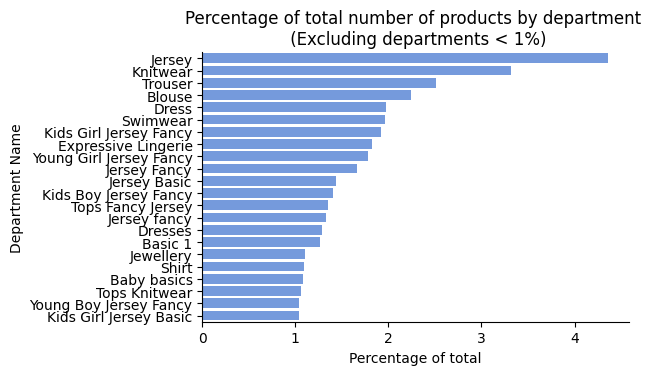

In [59]:
j = articles['department_name'].value_counts(normalize=True).reset_index()
j['perc'] = j['proportion']*100
j[j['proportion']>=0.01]

# Plotting dist by department_name
sns.barplot(j[j['proportion']>=0.01], x='perc', y='department_name',
           color='cornflowerblue')
sns.despine()
plt.title('Percentage of total number of products by department \n (Excluding departments < 1%)')
plt.xlabel('Percentage of total')
plt.ylabel('Department Name')

plt.show();

We do see some department_no have the same name. However, dropping no. and keep the department name as it is seems to still be applicable. In fact, we might want to drop both columns corresponding to department as the information stored is overlapping with other columns (i.e. product_group). We can discuss this in the EDA.

#### section_no and section_name

In [60]:
# Finding product_type_no with more than one unique prod_type_name
(articles.groupby('section_no')['section_name'].nunique()>1).sum()

0

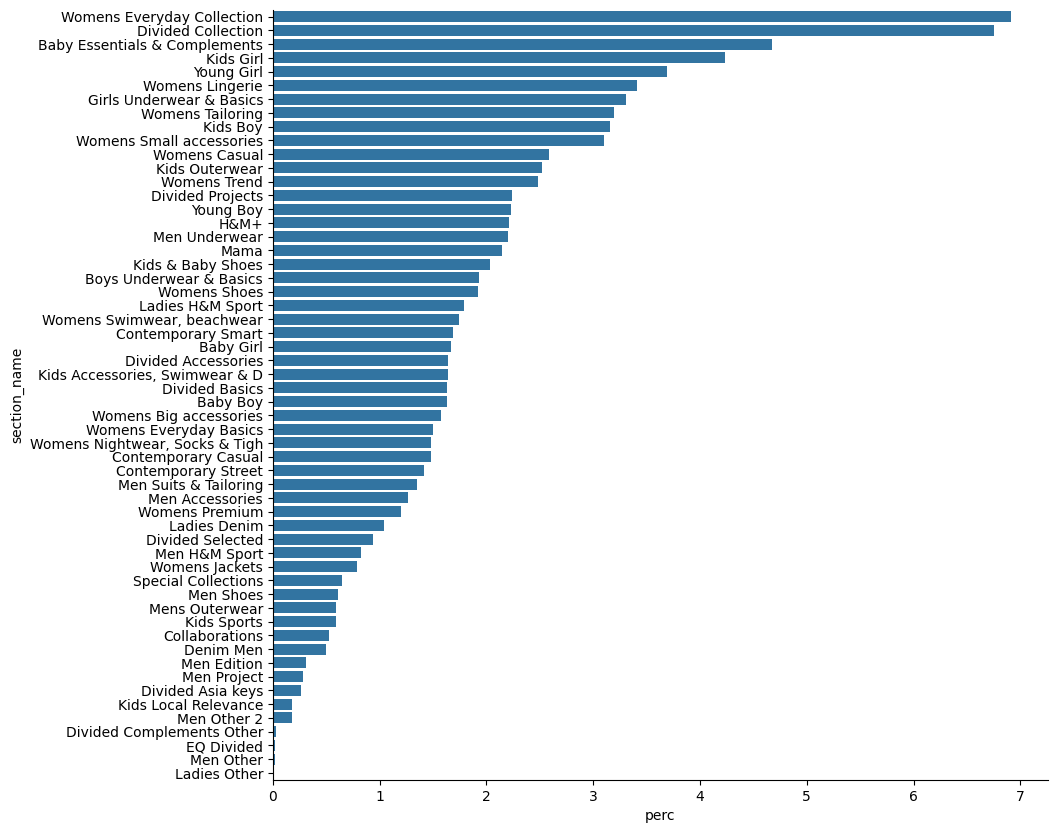

In [61]:
j = articles['section_name'].value_counts(normalize=True).reset_index()
j['perc'] = j['proportion']*100
plt.figure(figsize=(10,10))
sns.barplot(j, x='perc', y='section_name')
sns.despine()

We can drop section_no safely here as well, seems like section would be a column worth keeping by looking at the rather evenly distributed distribution.

---

### Dropping code columns

After looking into the columns and some cleaning, we can now safely drop the "code/no." columns to remove duplicated informations among columns.

In [62]:
# Getting the code columns from the cnpairs_diff dataframe defined earlier
cols_to_drop = cnpairs_diff.iloc[:,0].to_list()
print(cols_to_drop)
print(f'columns before dropping: {articles.shape[1]}')

# Dropping columns
articles.drop(cols_to_drop, axis=1, inplace=True)
print(f'columns after dropping: {articles.shape[1]}')

['product_code', 'product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_code', 'index_group_no', 'section_no', 'garment_group_no']
columns before dropping: 25
columns after dropping: 14


After dropping, we have 14 columns left in the articles table!

---

## Customers

### Shape, missing values, and duplicates

Again, for the customer table, we look at the shape, NANs, and duplicated first.

In [63]:
customers.shape

(1371980, 7)

Over 1.3M of customers, and 7 columns. Much less information here than in the articles table. Let's see if there are useful ones, we can drop those that are not useful.

In [64]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [285]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

We can already see some NaNs here in FN and Active. [Here](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/305952#1684481), we found a comment left by the competition host explaining these two variables:
- **FN**: if a customer get Fashion News newsletter
- **Active**: if the customer is active for communication

In [65]:
customers.duplicated().sum()

0

No duplicated rows.

---

### Imputing missing values

In [66]:
customers['FN'].value_counts()

FN
1.0    476930
Name: count, dtype: int64

In [67]:
customers['Active'].value_counts()

Active
1.0    464404
Name: count, dtype: int64

In [68]:
customers['club_member_status'].value_counts()

club_member_status
ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: count, dtype: int64

- `FN` and `Active` are either 1 or NaN, we would replace the NaN with 0 here.
- `club_member_status` are either ACTIVE, PRE_CREATE, or LEFT CLUB, we can assign NONE to the NaN obs.

In [69]:
# Impute NaNs for FN, Active, and club_member_status 
customers['FN'] = -customers['FN'].isna()
customers['Active'] = -customers['Active'].isna()
customers['club_member_status'] = customers['club_member_status'].fillna('NONE')

In [70]:
customers['fashion_news_frequency'].value_counts()

fashion_news_frequency
NONE         877711
Regularly    477416
Monthly         842
Name: count, dtype: int64

For the `fashion_news_frequency`, we would assign NaNs to the already exist **NONE** category.

In [71]:
# Impute fashion_news_frequency
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('NONE')

---

Next, age is a tricky one. Let's look at the distribution first.

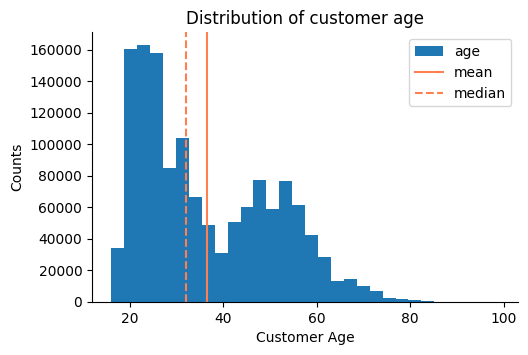

In [72]:
customers['age'].plot(kind='hist', bins=30)
plt.axvline(customers['age'].mean(), 0, 2000, c='coral', label='mean')
plt.axvline(customers['age'].median(), 0, 2000, c='coral', label='median', linestyle='--')
sns.despine()
plt.title('Distribution of customer age')
plt.xlabel('Customer Age')
plt.ylabel('Counts')
plt.legend()
plt.show();

In [73]:
print(customers['age'].isna().sum())
print(customers['age'].isna().mean()*100)

15861
1.1560664149623172


We have 15861 missing values for age, which is around 1.15% of the total observations. Imputing them with median age of all customers might not skew the distribution too much.

In [74]:
# fill NaN for customer age with median
customers['age'] = customers['age'].fillna(customers['age'].median())

Sanity check the distribution:

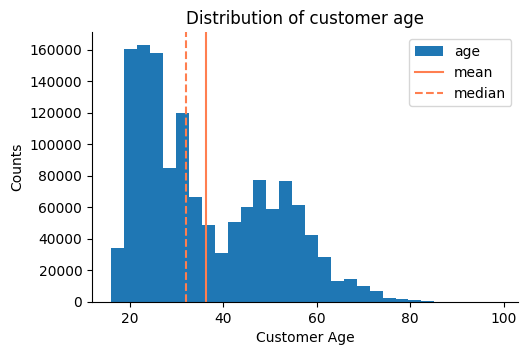

In [75]:
customers['age'].plot(kind='hist', bins=30)
plt.axvline(customers['age'].mean(), 0, 2000, c='coral', label='mean')
plt.axvline(customers['age'].median(), 0, 2000, c='coral', label='median', linestyle='--')
sns.despine()
plt.title('Distribution of customer age')
plt.xlabel('Customer Age')
plt.ylabel('Counts')
plt.legend()
plt.show();

Finally, sanity check if we have dealt with all missing values:

In [76]:
customers.isna().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64

**Note**: postal_code seems to be tokenized. We assume it is from all around the globe, hence might be messy. However, it is our only information about customer location. I think we can keep it for now and try to see if any valuable information could be derived from it.

In [77]:
customers['postal_code'].nunique()

352899

In [78]:
(customers['postal_code'].value_counts()<=10).sum()

341957

We have 352k unique postal code. However, 341k of them have less than 10 observations. Hmm... I might want to drop it before modeling, unless we can retrieve more information from the tokenized string.

---

## Transactions

In [4]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


It looks like we only have 5 columns in transactions:
- With **customer_id** we can merge the `customers` table.
- With **article_id** we can merge the `articles` table.
- **price** column here would be our only source if we want to approximate revenue for certain product category or time period (since we don't have price information in the `articles` table).  We don't have informations about the product *costs* as well.
- For **sales_channel_id**, we need to look further into what actual channel the id corresponds to.

### Shape, missing values, and duplicates

In [7]:
transactions.shape

(31788324, 5)

We have 31.7M transactions in our data...Let's check if any of the rows have missing values.

In [9]:
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

Nice, looks clean.  
Checking for duplicated rows:

In [15]:
transactions.duplicated().sum()

2974905

In [19]:
2974905/transactions.shape[0]

0.09358483322367042

It looks like there are quite some duplicated rows (almost 10%)... My assumptions is that since we don't have number of units in the transaction data, the duplicated rows might just be indicating the customer have purchased multiple units of the same items. Let's look into it.

In [17]:
trans_dup = transactions[transactions.duplicated()==True]
trans_dup.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
20,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
21,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
22,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2
25,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,676827002,0.042356,2
27,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,685687002,0.016932,2
29,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,680912006,0.016932,2
31,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,692454002,0.025407,2
33,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,640639001,0.010153,2


It does seems like duplicated rows are just multiple units being purchased. We can deal with this by adding a new column **units**, which counts the number of unique transactions of the same duplicates.

In [26]:
# Transforming data by adding units, eliminating duplicated rows.
transactions['units']=0
transactions = transactions.groupby(['t_dat','customer_id', 'article_id', 'price', 'sales_channel_id'])['units'].count().reset_index()

Sanity Check...

In [27]:
transactions.duplicated().sum()

0

In [28]:
transactions[transactions['units']>1]

,t_dat,customer_id,article_id,price,sales_channel_id,units
14,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,377277001,0.008458,2,2
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2,2
16,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.033881,2,2
17,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2,4
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,640639001,0.010153,2,2
...,...,...,...,...,...,...
28813325,2020-09-22,feede16a97612dbe30e7157dce5797b78cab0eda03e146...,919273002,0.042356,2,2
28813362,2020-09-22,ff54fe15368409b7d0d691cdeebe2d6a3fee5178105277...,885315003,0.050102,2,3
28813379,2020-09-22,ff6f55a51af284b71dcd264396b299e548f968c1769e71...,919786002,0.042356,2,2
28813389,2020-09-22,ff94f31e864d9b655643ac4d2adab3611c7241adb5d34c...,901666001,0.084729,2,2


In [32]:
transactions.shape

(28813419, 6)

After transformation, we have around 28.8M actual transactions left, with around 2.5M of them having multiple units. Note that the price here becomes the unit_price, might want to specity that before going further.

In [31]:
transactions = transactions.rename(columns={'price':'unit_price'})
transactions.head()

,t_dat,customer_id,article_id,unit_price,sales_channel_id,units
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2,1
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,1


---

### Data types

Let's check if the data types are in correct format.

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


Looks like we need to change **t_dat** to datetime format.

In [12]:
# Change t_data foramt to date
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

Sanity check...

In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


**sales_channel_id** needs some context added. We can actually find information [here](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/discussion/305952#1684481), which says "2 is online and 1 is store".
- 2: Online
- 1: Store

In [34]:
transactions['sales_channel_id'].value_counts()

sales_channel_id
2    19686806
1     9126613
Name: count, dtype: int64

It seems like a lot more transactions are made online... Let's add this context to our data:

In [33]:
# Change from (2,1) to (Online, Store)
transactions['sales_channel'] = np.where(transactions['sales_channel_id']==1, 'Store', 'Online')
transactions['sales_channel'].value_counts()

sales_channel
Online    19686806
Store      9126613
Name: count, dtype: int64

In [35]:
# Dropping the sales_channel_id
transactions = transactions.drop('sales_channel_id', axis=1)
transactions.head()

,t_dat,customer_id,article_id,unit_price,units,sales_channel
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,1,Online
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,Online
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,1,Online
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,1,Online
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,1,Online


Looks like we are ready to merge the data..

---

## Merging the dataset

Before merging, let's verify the following 2 things:
- What proportion of the unique customer_id in the customers table v.s. in the transactions table
- What proportion of the unique article_id in the artices table v.s. in the transactions table

In [79]:
# proportion of the unique customer_id in the customers table v.s. in the transactions table
transactions['customer_id'].nunique()/customers['customer_id'].nunique()

0.9929306549658158

In [80]:
# proportion of the unique article_id in the articles table v.s. in the transactions table
transactions['article_id'].nunique()/articles['article_id'].nunique()

0.9905724735176518

The proportion matches pretty well, no more than 1% of the ids not there for transactions. We can start merging the data

In [82]:
# Joining the data
temp = transactions.merge(articles, how='left', on='article_id')
hm_sales = temp.merge(customers, how='left', on='customer_id')
hm_sales.head()

,t_dat,customer_id,article_id,unit_price,units,sales_channel,prod_name,product_type_name,product_group_name,graphical_appearance_name,...,index_group_name,section_name,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,1,Online,Rae Push (Melbourne) 2p,Bra,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,1,Online,Atlanta Push Body Harlow,Underwear body,Underwear,Solid,...,Ladieswear,Womens Lingerie,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",False,False,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,1,Online,Inca Jumper,Sweater,Garment Upper body,Melange,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,1,Online,Inca Jumper,Sweater,Garment Upper body,Melange,...,Divided,Divided Selected,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,1,Online,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Melange,...,Ladieswear,Womens Everyday Collection,Special Offers,V-neck knitted jumper with long sleeves and ri...,True,True,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...


In [83]:
hm_sales.shape

(28813419, 25)

After merging, verify the following 2 things:
- Are there any customer_id recorded in the transaction table not in customers table?
- Are there any article_id recorded in the transaction table not in articles table?  

We can simply do this by checking for NaNs in any of the columns of customers and articles.

In [84]:
hm_sales['FN'].isna().sum()

0

In [85]:
hm_sales['product_type_name'].isna().sum()

0

No missing values! We can save the merged dataframe now!

In [86]:
hm_sales.to_csv('hm_sales.csv', index=False)

OSError: [Errno 28] No space left on device